### Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00547/

### EDA
- Data Profiling
- Stastical analysis
- Graphical Analysis

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline
# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

#### Loading the dataset

In [3]:
algerian=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
algerian

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


#### Feature details of the dataset
- RH: Relative Humidity
-  Ws: Wind Speed
- Rain: Rainfall
- FFMC: Fine Fuel Moisture Code
- DMC: Duff Moisture Code
- DC: Drought Code
- ISI: Initial Spread Index
- BUI: Buildup Index
- FWI: Fire Weather Index
- Classes: If there was an event of fire or not

#### This dataset contains data for two regions 'Bejaia' and 'Sidi-Bel Abbes' with separate headers. Need to modify the dataset to combine data for both regions under one header for the ease of analysis 

In [8]:
algerian.loc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


##### Adding a new Column 'Region' to show the two regions and deleting the extra header and region name rows

In [13]:
algerian['Region']=''
algerian['Region'][:122]='Bejaia'
algerian

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,


In [18]:
algerian['Region'].loc[124:]='Sidi-Bel Abbes'
algerian.reset_index(inplace=True)

In [20]:
algerian

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


### Basic info

In [21]:
algerian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    object
 2   month        244 non-null    object
 3   year         244 non-null    object
 4   Temperature  244 non-null    object
 5    RH          244 non-null    object
 6    Ws          244 non-null    object
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      243 non-null    object
 15  Region       244 non-null    object
dtypes: int64(1), object(15)
memory usage: 30.6+ KB


In [22]:
algerian.shape

(244, 16)

#### Observation
- all of the features are object type. There are 244 rows and 16 columns in the dataset.

#### There are spaces in the feature names. Need to remove the spaces to avoid any error

In [33]:
algerian.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [34]:
for features in algerian.columns:
    algerian.rename(columns={features:features.strip(' ')},inplace=True)
algerian.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Changing the feature types to float except for 'day', 'month', 'year' and 'Region' for ease of analysis. 'day', 'month', 'year' will be changed to int and 'Region' will remain as Object for now. We will see if it needs any change later.

In [37]:
for features in algerian.columns:
    if features in ['day', 'month', 'year']:
        algerian[features]=algerian[features].astype(int)
    elif features!='Region':
        algerian[features]=algerian[features].astype(float)
algerian.info()

ValueError: could not convert string to float: '14.6 9'

#### It is evident from the above error message that there is an incorrect data '14.6 9' in the dataset. Need to find the data and correct it

In [39]:
for features in algerian.columns:
    for values in algerian[features]:
        if values=='14.6 9':
            print(features)
            break

DC


In [43]:
algerian['DC']=algerian['DC'].apply(lambda x:x.replace(' ',''))
algerian[algerian['DC']=='14.69']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37.0,37.0,18.0,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN,Sidi-Bel Abbes


#### The necessary correction has been done on the incorrect data. We will attempt to run the same code again to change the data types again

In [52]:
for features in algerian.columns:
    try:
        if features in ['day', 'month', 'year']:
            algerian[features]=algerian[features].astype(int)
        elif features not in ['Region','Classes']:
            algerian[features]=algerian[features].astype(float)
    except Exception as e:
        print(features,'\n',str(e))

FWI 
 could not convert string to float: 'fire   '


#### Again the above code throws an error. There is a value 'fire   ' in the FWI column which we need to correct.

In [56]:
for features in algerian.columns:
    try:
        if features in ['day', 'month', 'year']:
            algerian[features]=algerian[features].astype(int)
        elif features not in ['Region','Classes','FWI']:
            algerian[features]=algerian[features].astype(float)
    except Exception as e:
        print(features,'\n',str(e))

In [57]:
algerian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(9), int32(3), object(3)
memory usage: 25.9+ KB


In [91]:
# The transformation is completed as expected except for the feature FWI which has an incorrect data. Need to correct the data.
#we will simply delete the row with incorrect data
algerian[algerian['FWI']=='fire   ']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_num


In [63]:
algerian.drop(index=165,axis=0,inplace=True)

In [64]:
algerian['FWI']=algerian['FWI'].astype(float)

In [65]:
algerian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(10), int32(3), object(2)
memory usage: 27.5+ KB


#### Encoding the 'Classes' into int for better analysis
- 1 if 'fire'
- 0 if 'not fire'

In [82]:
algerian['Classes']=algerian['Classes'].apply(lambda x: x.strip(' '))
algerian['Classes_num']=algerian['Classes'].map({'not fire':0,'fire':1})
algerian.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_num
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,0
5,6,6,2012,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,Bejaia,1
6,7,6,2012,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,Bejaia,1
7,8,6,2012,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,Bejaia,1
8,9,6,2012,25.0,88.0,13.0,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,Bejaia,0
9,10,6,2012,28.0,79.0,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,Bejaia,0


In [84]:
#### Separating Numerical and Categorical features
numeric_features=[f for f in algerian.columns if algerian[f].dtype!='O']
categorical_features=[f for f in algerian.columns if algerian[f].dtype=='O']
print('numerical features:',numeric_features,'\ncategorical features',categorical_features)

numerical features: ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes_num'] 
categorical features ['Classes', 'Region']


### Statistical Analysis

In [85]:
algerian[numeric_features].describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_num
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


#### Covariance of numeric features

In [86]:
algerian[numeric_features].cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_num
day,78.190729,-0.003639,0.0,3.119138,-9.969476,1.188603,-1.993174,28.544043,53.863133,222.524339,6.632060,65.061368,23.079143,0.891321
month,-0.003639,1.242764,0.0,-0.229653,-0.681903,-0.124987,0.077762,0.272433,0.938676,6.722457,0.303838,1.349400,0.685464,0.013298
year,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temperature,3.119138,-0.229653,0.0,13.162670,-35.043482,-2.901949,-2.372850,35.222858,21.837668,65.071727,9.101371,23.734918,15.297068,0.930330
RH,-9.969476,-0.681903,0.0,-35.043482,219.874333,10.173809,6.604836,-137.215388,-75.071928,-160.400449,-42.298446,-74.653741,-64.096917,-3.184454
Ws,1.188603,-0.124987,0.0,-2.901949,10.173809,7.903887,0.965886,-6.718952,-0.025120,10.604530,0.099643,1.257586,0.677079,-0.097745
Rain,-1.993174,0.077762,0.0,-2.372850,6.604836,0.965886,4.012837,-15.634746,-7.169025,-28.456455,-2.891688,-8.546509,-4.835502,-0.377380
FFMC,28.544043,0.272433,0.0,35.222858,-137.215388,-6.718952,-15.634746,205.912204,107.342972,347.051372,44.113113,120.872510,73.791799,5.487161
DMC,53.863133,0.938676,0.0,21.837668,-75.071928,-0.025120,-7.169025,107.342972,153.587434,517.427748,35.032228,173.203205,80.764530,3.606817
DC,222.524339,6.722457,0.0,65.071727,-160.400449,10.604530,-28.456455,347.051372,517.427748,2272.009994,100.718521,638.862525,262.277746,12.106907


#### Standard Deviation

In [87]:
algerian[numeric_features].std()

day            8.842552e+00
month          1.114793e+00
year           2.278430e-13
Temperature    3.628039e+00
RH             1.482816e+01
Ws             2.811385e+00
Rain           2.003207e+00
FFMC           1.434964e+01
DMC            1.239304e+01
DC             4.766561e+01
ISI            4.154234e+00
BUI            1.422842e+01
FWI            7.440568e+00
Classes_num    4.969382e-01
dtype: float64

In [88]:
#### Correlation of Numeric features
algerian[numeric_features].corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_num
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123


#### Observation
- Temperature, FFMC, DMC, DC, ISI, BUI, FWI are highly positively correlated with cases of fire
- RH, Ws, Rain are negatively correlated with cases of fire

In [90]:
algerian[algerian['Classes_num']==1]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_num
5,6,6,2012,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,Bejaia,1
6,7,6,2012,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,Bejaia,1
7,8,6,2012,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,Bejaia,1
10,11,6,2012,31.0,65.0,14.0,0.0,84.5,12.5,54.3,4.0,15.8,5.6,fire,Bejaia,1
11,12,6,2012,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,fire,Bejaia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,19,9,2012,29.0,41.0,8.0,0.1,83.9,24.9,86.0,2.7,28.9,5.6,fire,Sidi-Bel Abbes,1
234,21,9,2012,35.0,34.0,17.0,0.0,92.2,23.6,97.3,13.8,29.4,21.6,fire,Sidi-Bel Abbes,1
235,22,9,2012,33.0,64.0,13.0,0.0,88.9,26.1,106.3,7.1,32.4,13.7,fire,Sidi-Bel Abbes,1
236,23,9,2012,35.0,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,fire,Sidi-Bel Abbes,1


### Graphical Analysis

#### Region wise fire cases

In [116]:
data_fire_cases=algerian.groupby('Classes')['Region'].value_counts()
data_fire_cases

Classes   Region        
fire      Sidi-Bel Abbes    78
          Bejaia            59
not fire  Bejaia            63
          Sidi-Bel Abbes    43
Name: Region, dtype: int64

#### Plotting region wise fire cases

<AxesSubplot:xlabel='Classes', ylabel='count'>

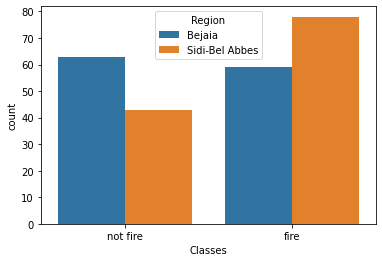

In [119]:
sns.countplot(data=algerian, x='Classes', hue='Region')

In [122]:
#checking numerical values
algerian[numeric_features].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes_num      2
dtype: int64

### Continuous and discrete numerical features

In [128]:
continuous_features=[features for features in algerian.columns if len(algerian[features].unique())>35]
discrete_features=[features for features in algerian.columns if len(algerian[features].unique())<35]
print('continuous_features:',continuous_features,'\ndiscrete_features',discrete_features)

continuous_features: ['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] 
discrete_features ['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region', 'Classes_num']


### distribution of numeric features

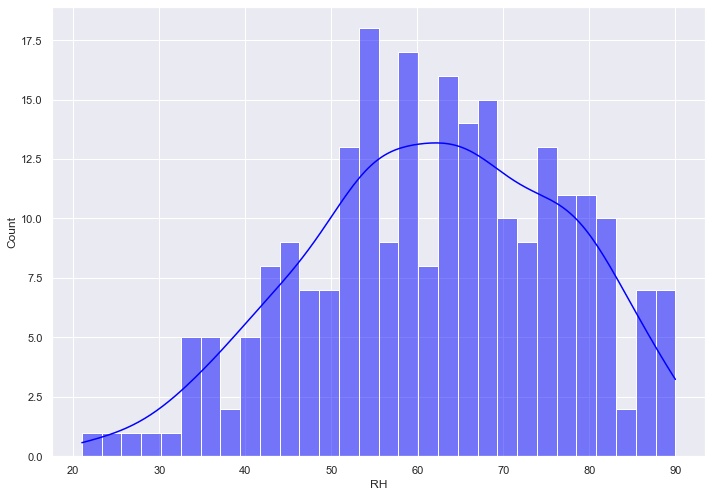

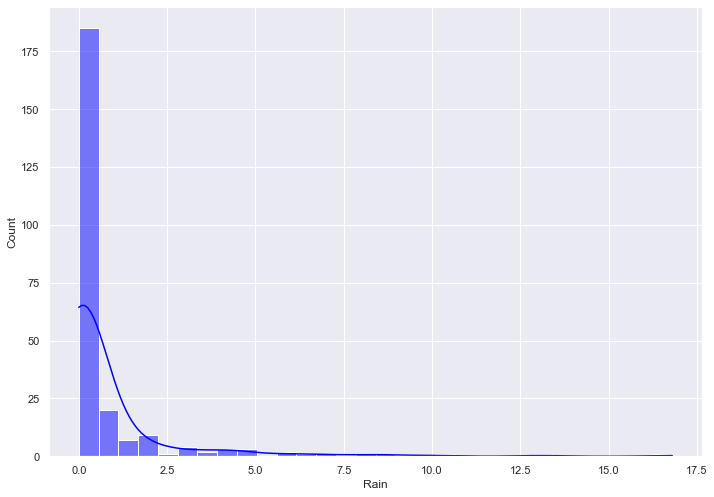

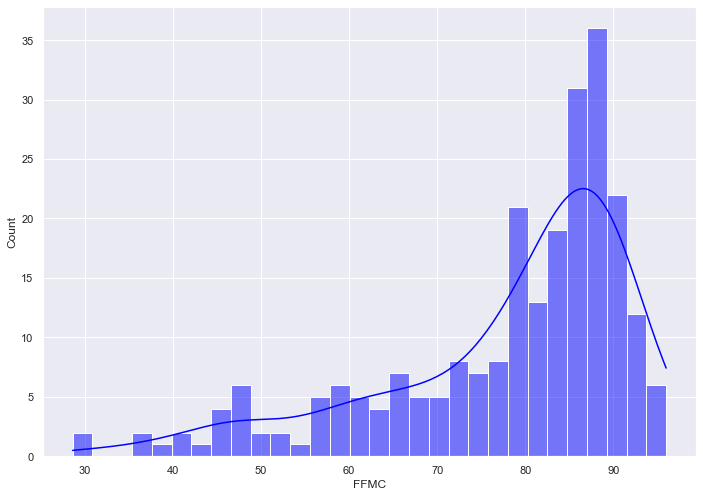

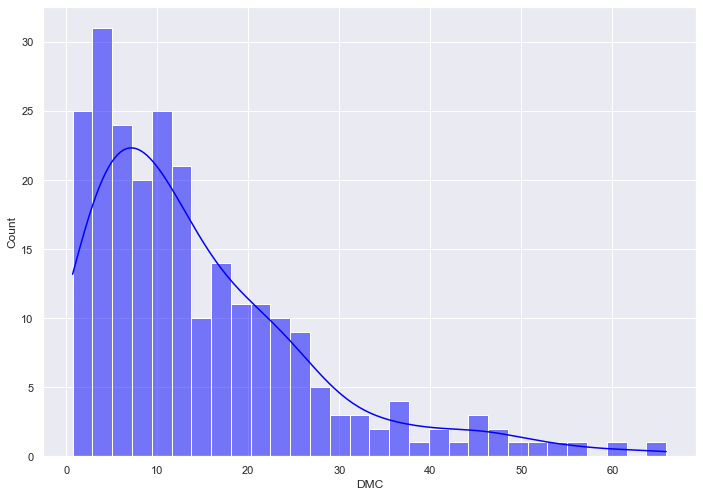

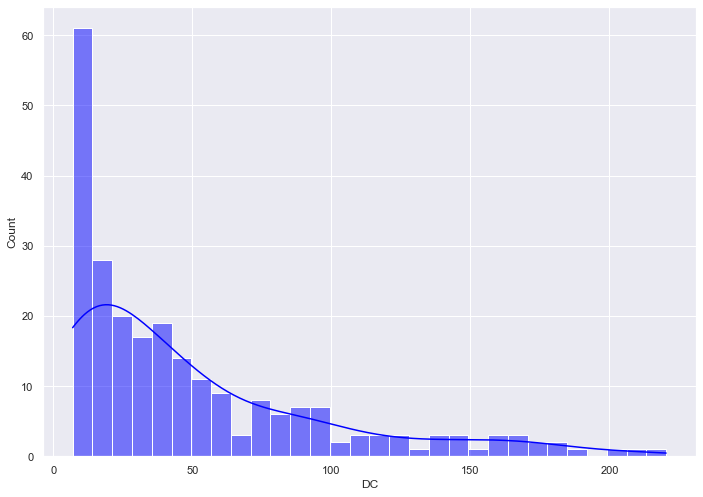

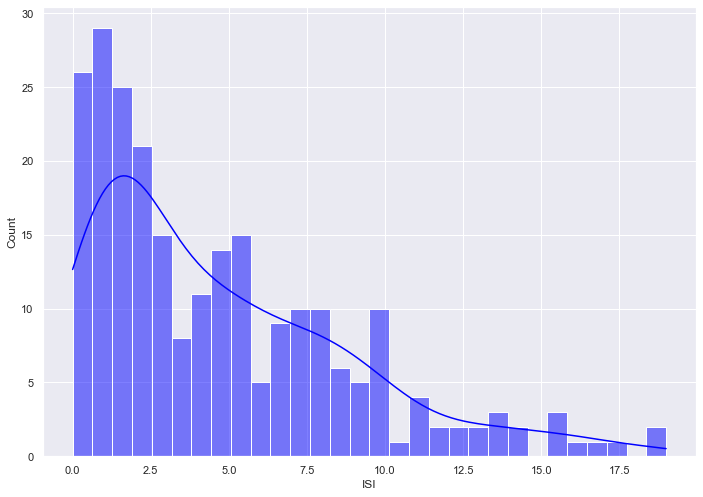

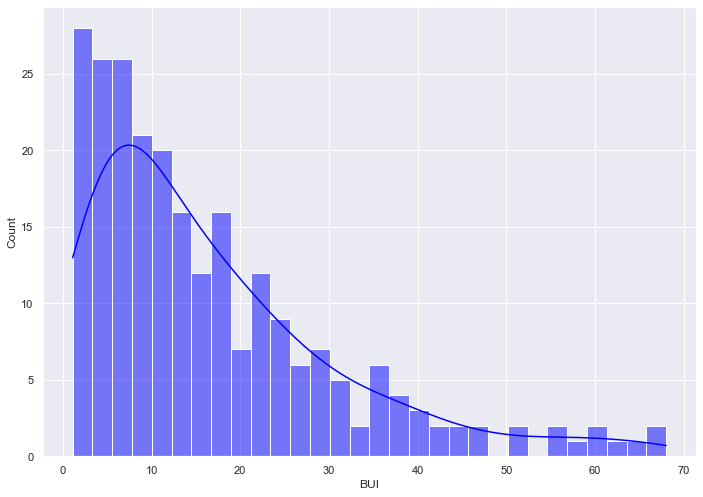

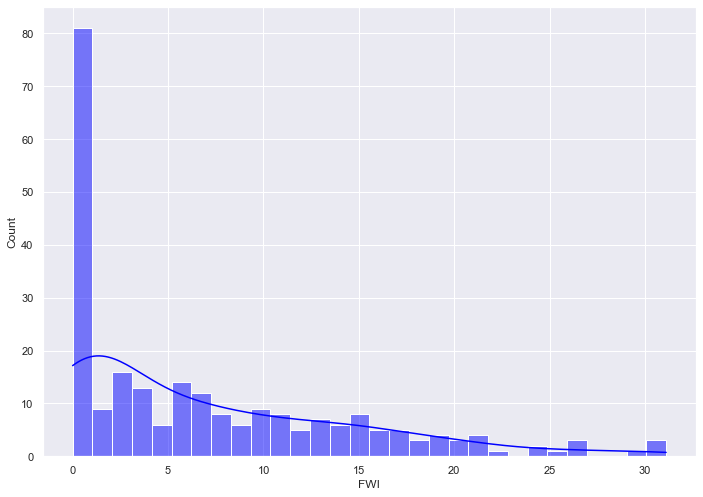

In [167]:
for features in continious_features:
    sns.histplot(data=algerian, x=features,kde=True, bins=30, color='blue')
    plt.show()

#### Observation
- RH is normally distributed
- DC, ISI, BUI, FWI are all right skwed

### plotting discrete features against target feature 'Classes'

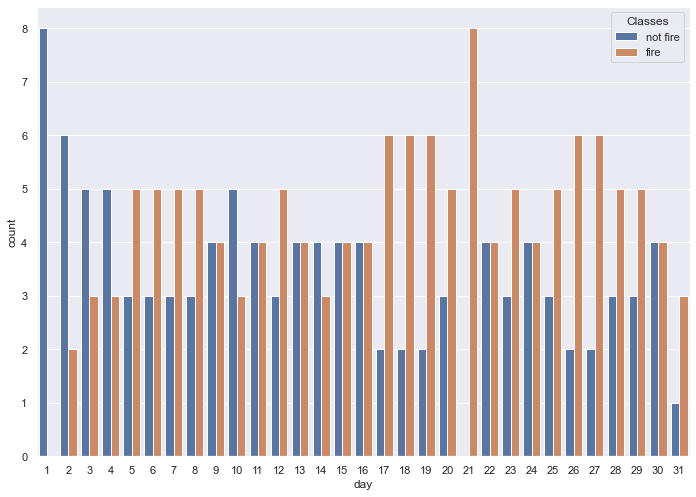

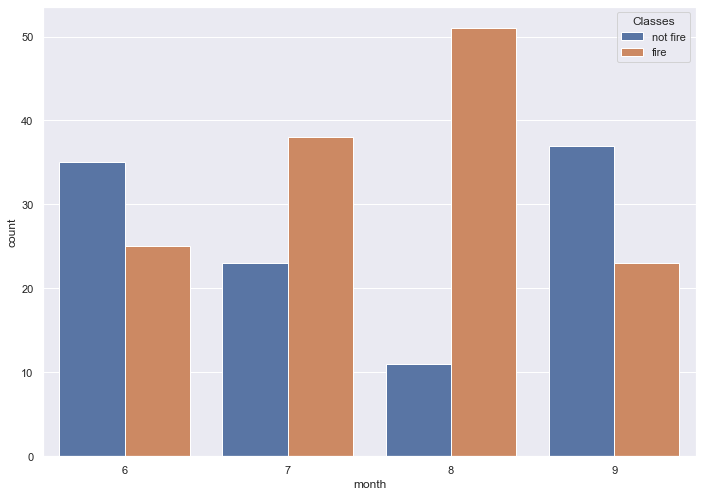

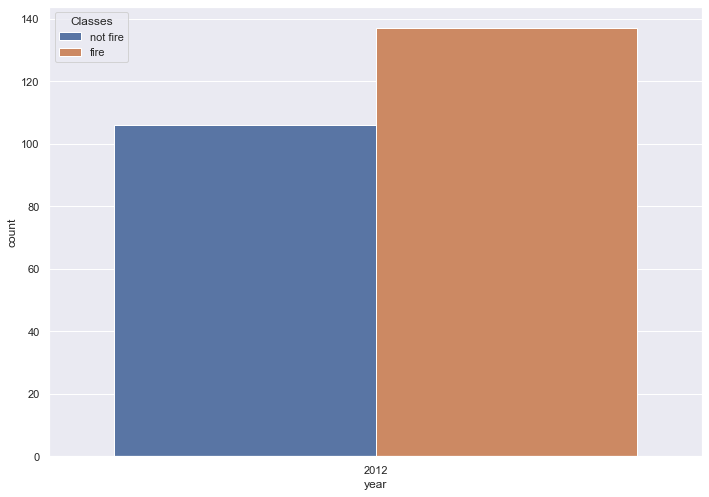

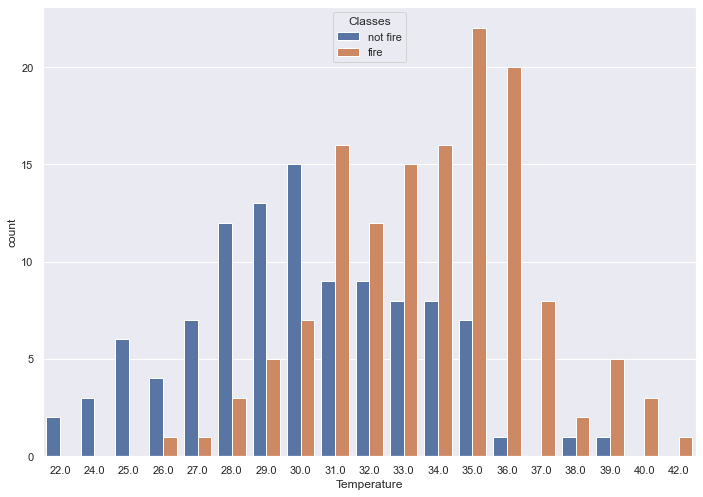

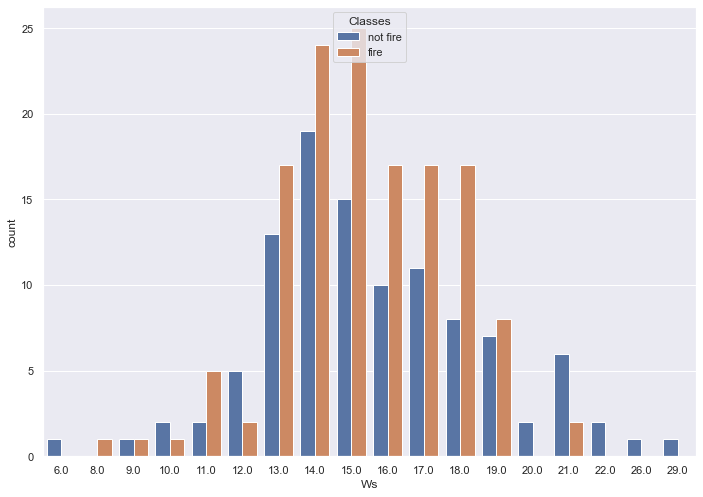

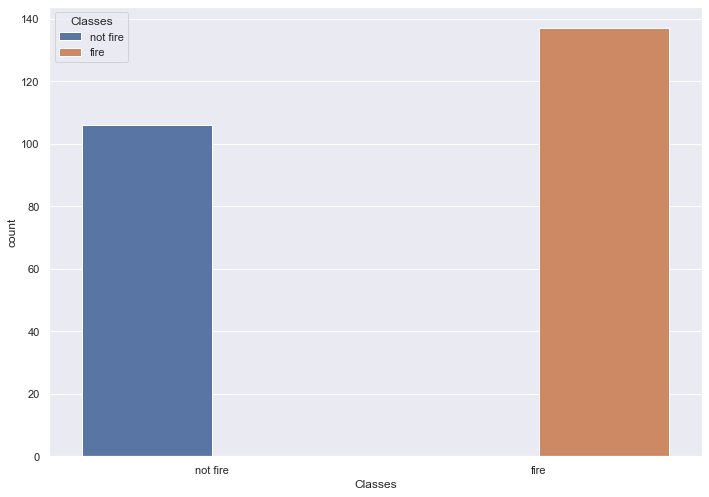

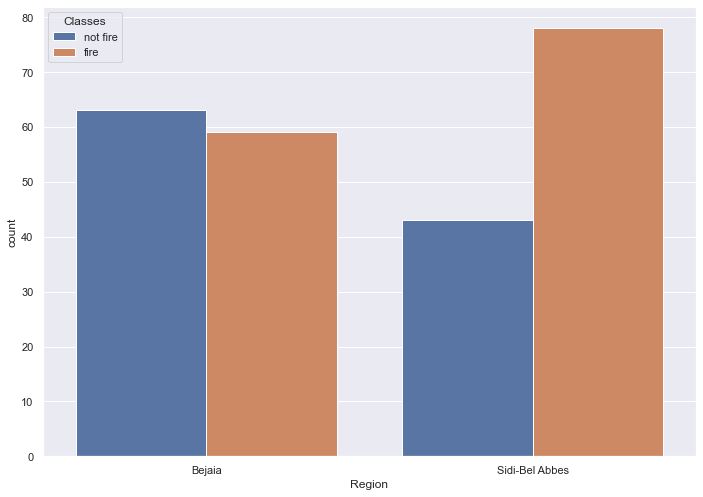

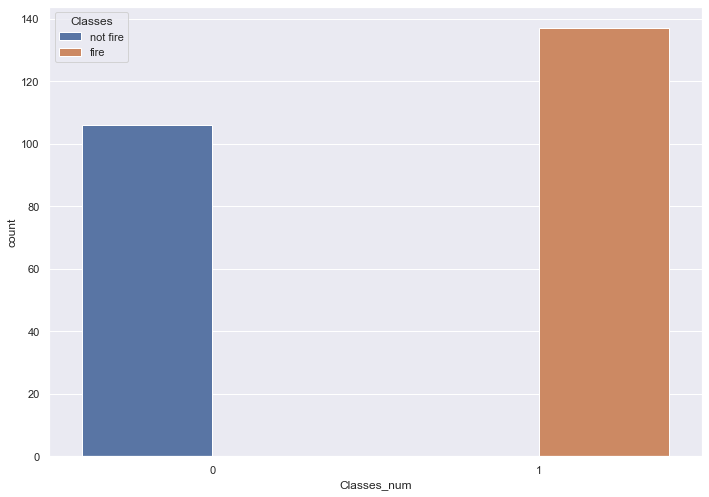

In [166]:
for features in discrete_features:
    sns.countplot(data=algerian, x=features, hue='Classes')
    plt.show()

#### Observation
- almost all days of the month had fire cases
- August had most number of fire cases compared to rest of  the months
- fire cases outnumbered no fire cases
- there is a rise of fire cases with rising temperature
- Side-Bel Abbes sees has more fire cases than no fire cases

### Checking Outliers

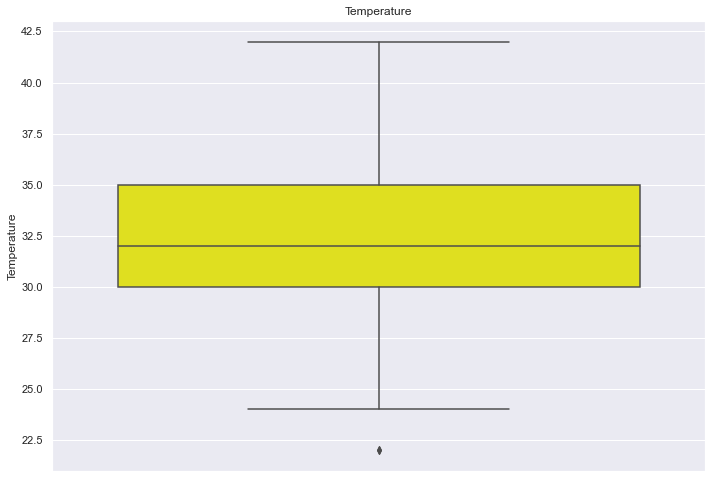

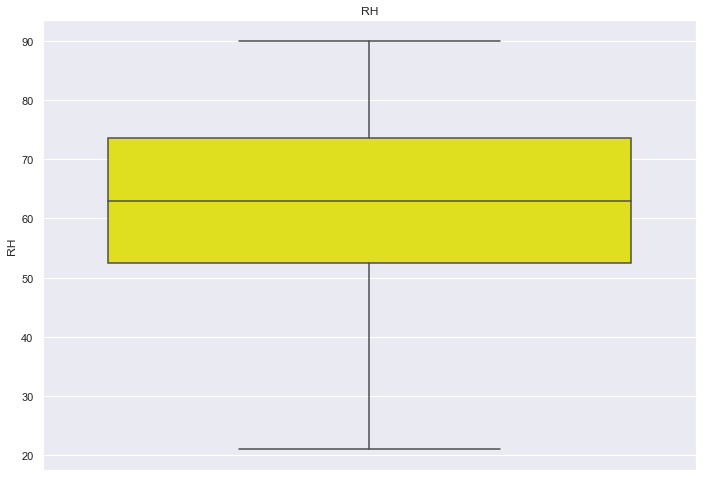

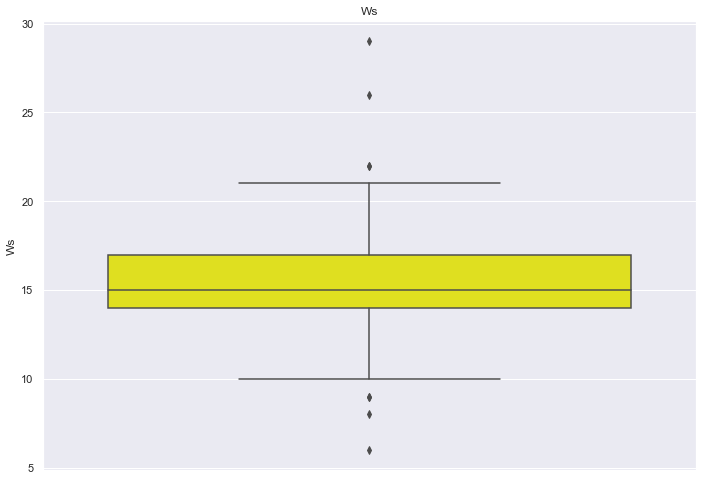

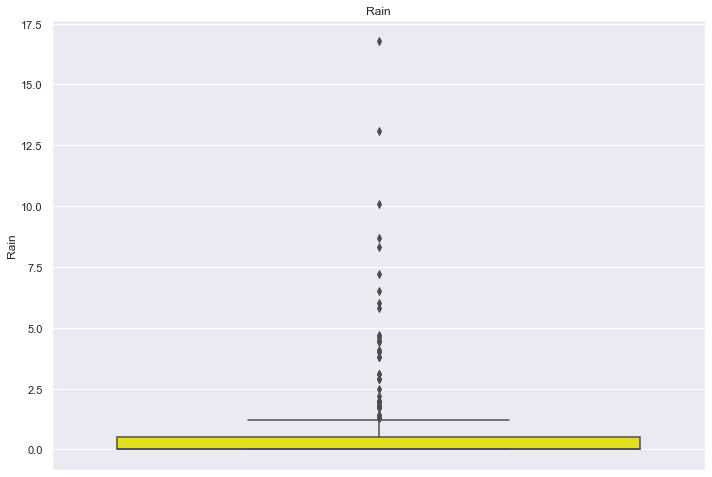

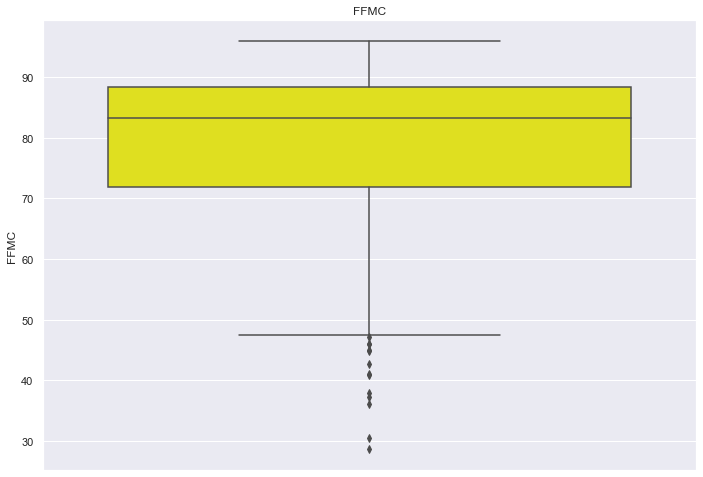

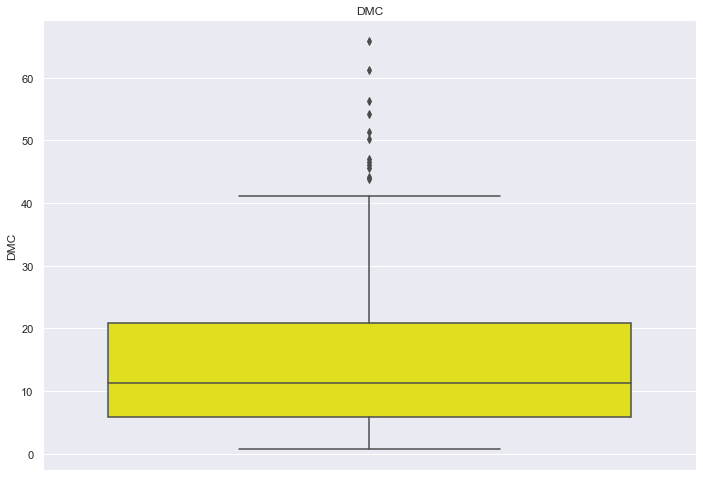

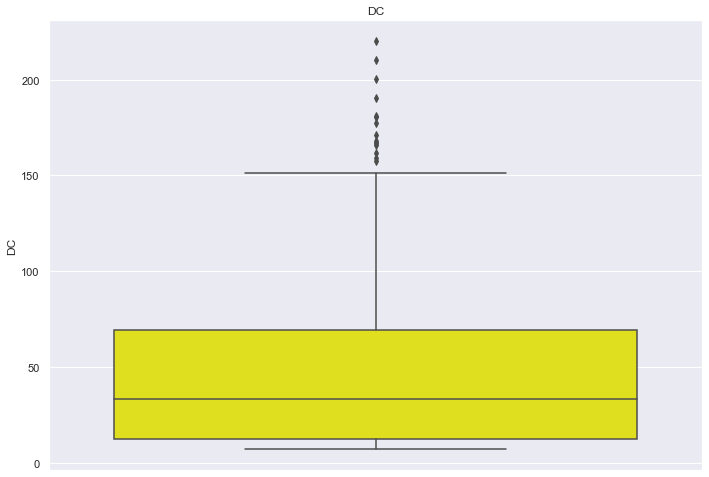

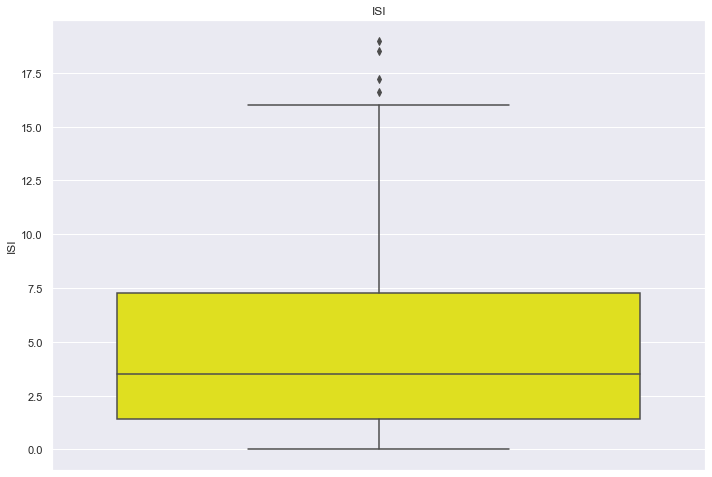

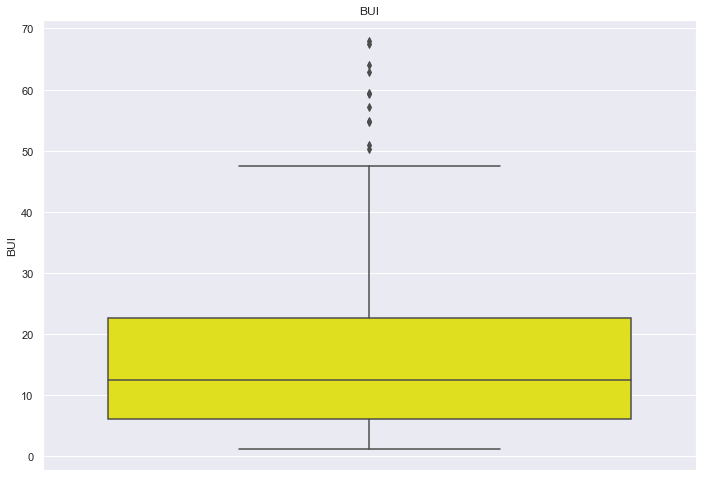

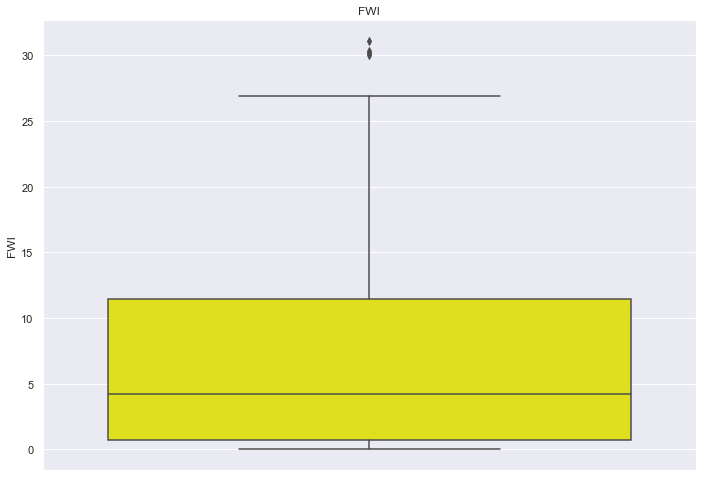

In [171]:
for features in [features for features in numeric_features if features not in ['day', 'month','year', 'Classes_num']]:
    sns.boxplot(data=algerian,y=features,color='yellow')
    plt.title(features)
    plt.show() 

#### Observation
- all the features have outliers except Temperature

#### Correlation between numerical features

In [172]:
data= round(algerian[[feature for feature in numeric_features if feature not in ['day', 'month','year', 'Region','Classes_num']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.49,0.38,0.60,0.46,0.57
RH,-0.65,1.00,0.24,0.22,-0.64,-0.41,-0.23,-0.69,-0.35,-0.58
Ws,-0.28,0.24,1.00,0.17,-0.17,-0.00,0.08,0.01,0.03,0.03
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32
FFMC,0.68,-0.64,-0.17,-0.54,1.00,0.60,0.51,0.74,0.59,0.69
DMC,0.49,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.68,0.98,0.88
DC,0.38,-0.23,0.08,-0.30,0.51,0.88,1.00,0.51,0.94,0.74
ISI,0.60,-0.69,0.01,-0.35,0.74,0.68,0.51,1.00,0.64,0.92
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86
FWI,0.57,-0.58,0.03,-0.32,0.69,0.88,0.74,0.92,0.86,1.00


#### Visualise the correlation through heatmap

<AxesSubplot:>

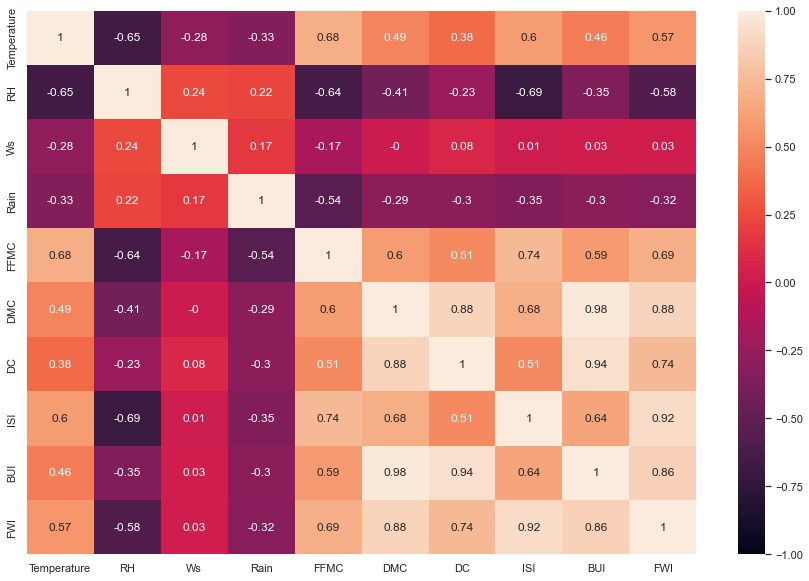

In [175]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True, vmin=-1, vmax=1)

#### Observation
- highly co-related DMC-BUI, DMC-DC, ISI-FWI, BUI-FWI
- moderately co-related FWI-DC, ISI-DC, ISI-BUI
- negatively co-related Rain-Temperature, FFMC-RH, ISI-RH, FWI-RH, ISI-Rain

#### Relation between numerical features and target feature

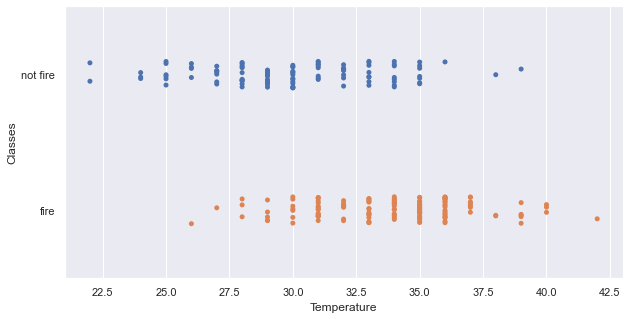

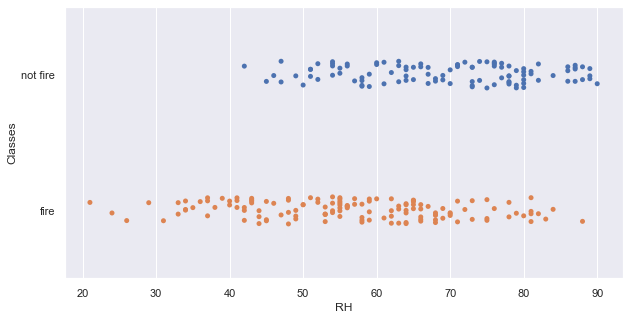

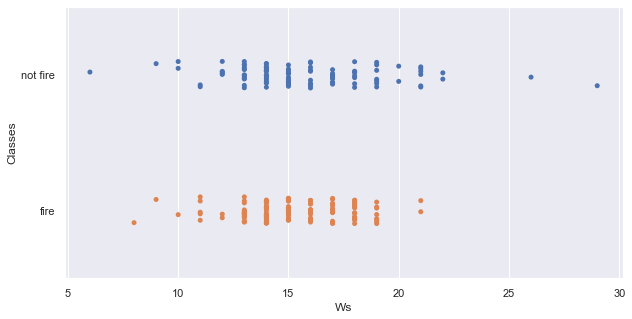

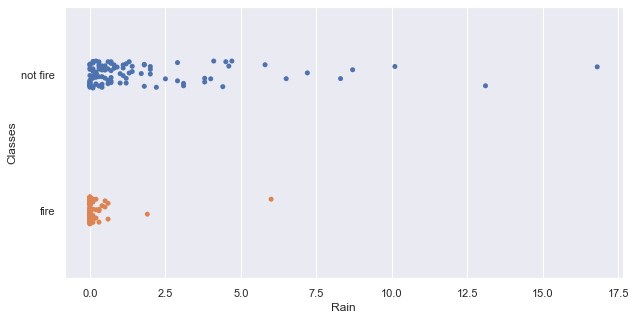

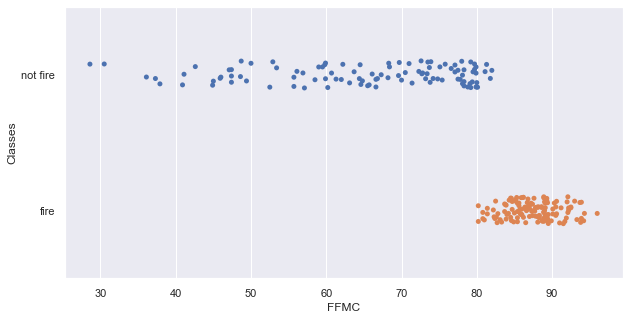

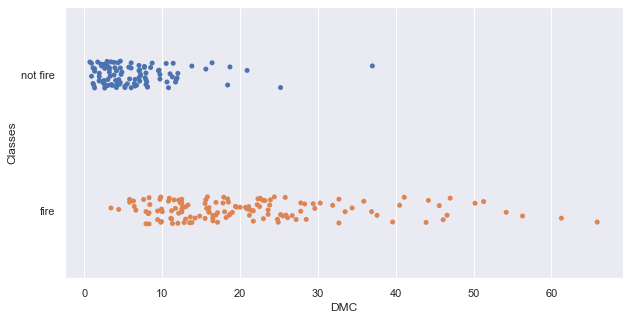

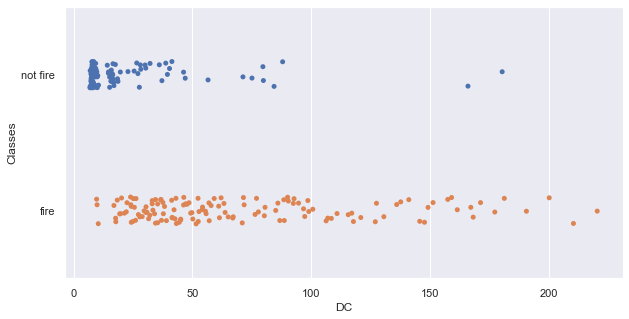

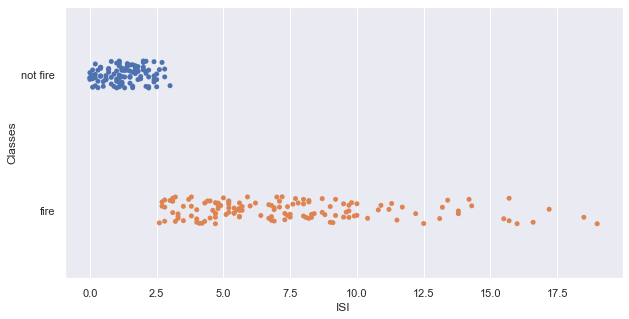

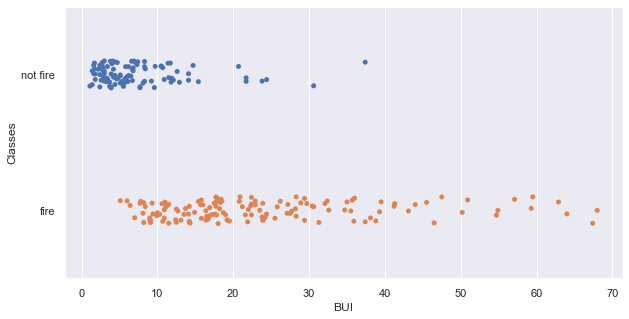

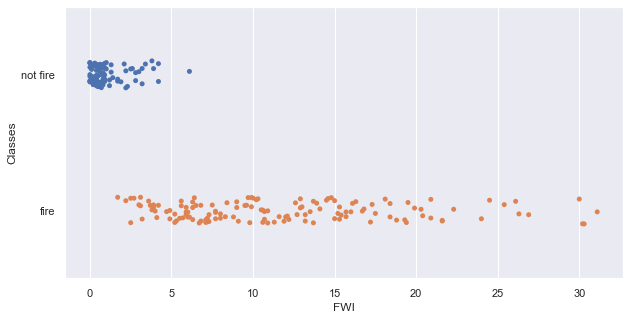

In [178]:
num_feature_custom=[feature for feature in numeric_features if feature not in ['day', 'month', 'year', 'Region','Classes_num']]
sns.set(rc={'figure.figsize':(10,5)})
for feature in num_feature_custom:
 sns.stripplot(data=algerian, x=feature, y='Classes')
 plt.show();

#### Special observation for the month of August when most fire cases occured

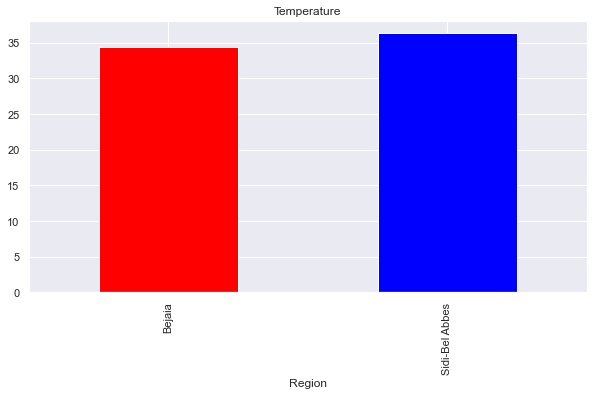

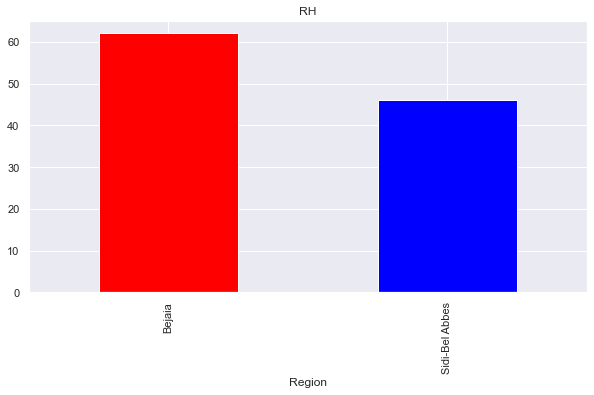

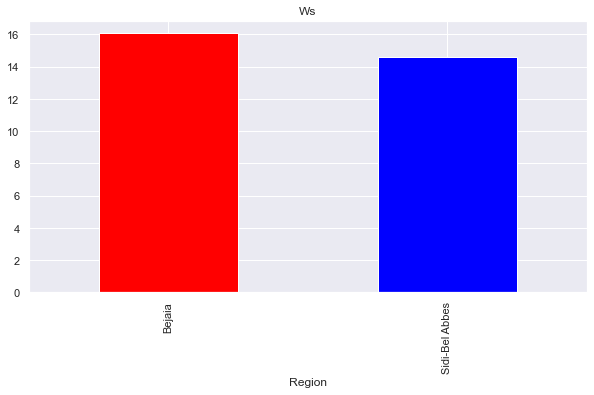

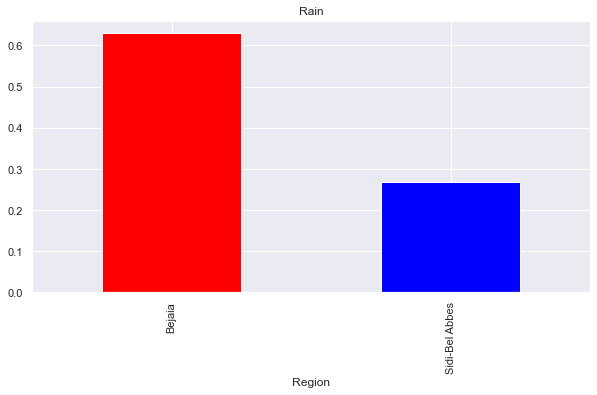

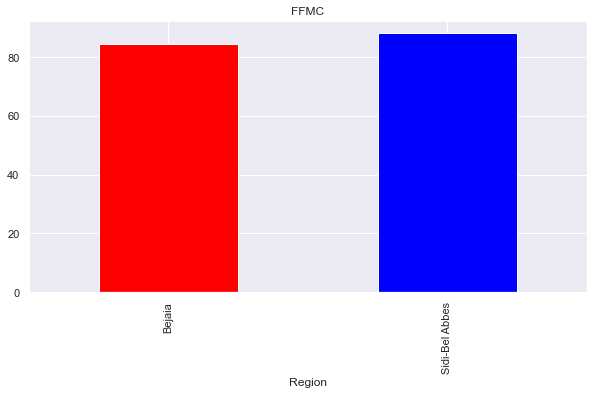

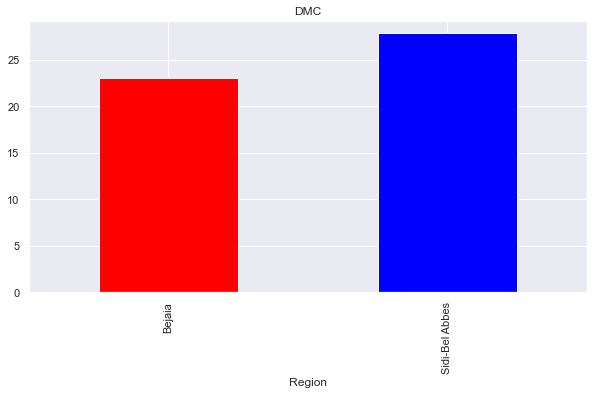

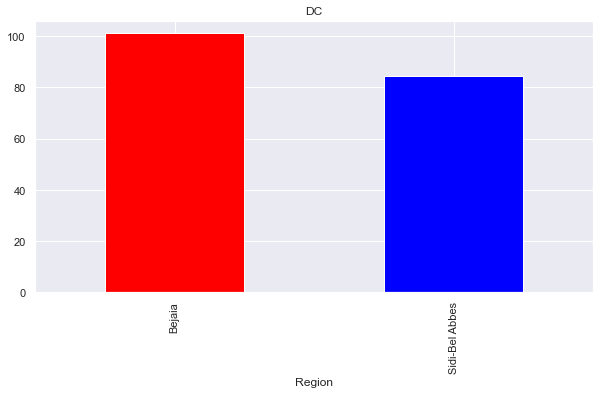

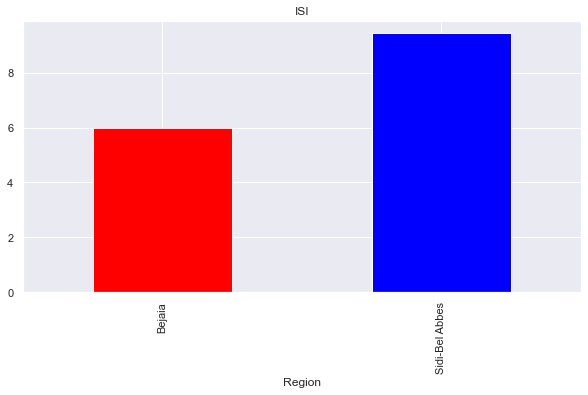

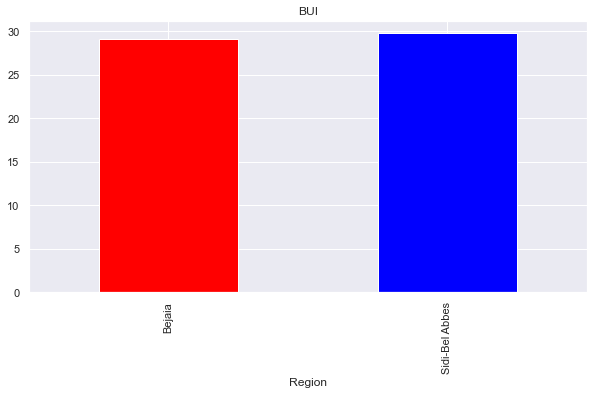

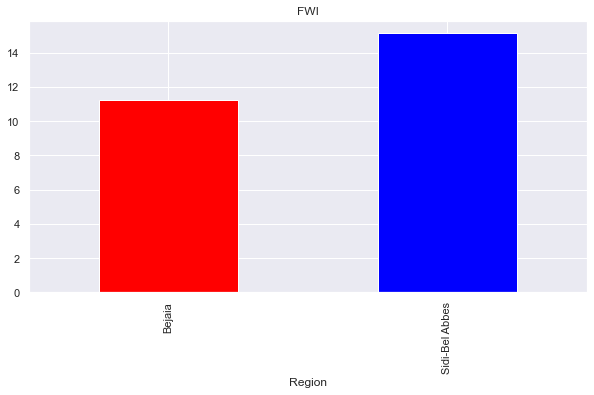

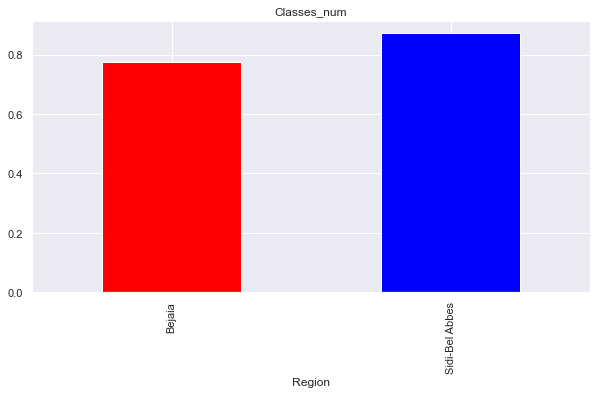

In [196]:
aug_data=algerian[algerian['month']==8].groupby('Region').mean().iloc[::,3:]
for features in range(len(aug_data.columns)):
    aug_data.iloc[::,features].plot.bar(color=['red','blue','pink','yellow','green','grey'])
    plt.xlabel='Region'
    plt.ylabel=aug_data.columns[features]
    plt.title(aug_data.columns[features])
    plt.show()

#### Final Report
- Most fire cases occured between 28-40 temperature range
- More the rain, lesser the fire cases
- 80-90 FFMC range sees most fire cases
- Most fire cases occured between 13-19 wind speed
- Maximum cases of fire occured in the month of August
- Most cases of fire occured between ISI range 2.5-7.5
- Average temperature in Aug was around 35 for both regions
- Average Rainfall in Sidi-Bel Abbes was lesser than that in Bejaia